In [2]:
import tensorflow as tf
from tensorflow.keras import layers, losses, models

# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only allocate 6GB of memory on the first GPU
#   try:
#     tf.config.experimental.set_virtual_device_configuration(
#         gpus[0],
#         [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=6144)])
#     logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#   except RuntimeError as e:
#     # Virtual devices must be set before GPUs have been initialized
#     print(e)

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

In [3]:
def get_cnn():
    
    Input = layers.Input((80, 240, 3))
    x = Input
    x = layers.Conv2D(filters=16, kernel_size=(3, 3), strides=1, padding='same', activation='relu')(x)
    x = layers.MaxPool2D(pool_size=(2, 2), padding='same', strides=2)(x)
    for i in range(3):
        x = layers.Conv2D(filters=32 * 2 ** i, kernel_size=(3, 3), padding='same', activation='relu')(x)
        x = layers.Conv2D(filters=32 * 2 ** i, kernel_size=(3, 3), padding='same', activation='relu')(x)
        x = layers.MaxPool2D(pool_size=(2, 2), padding='same', strides=2)(x)
        x = layers.Dropout(0.5)(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.3)(x)
    Output = [layers.Dense(68, activation='softmax', name='c%d' % (i + 1))(x) for i in range(7)]
    model = models.Model(inputs=Input, outputs=Output)

    return model

In [4]:
t = ["皖", "沪", "津", "渝", "冀", "晋", "蒙", "辽", "吉", "黑", "苏", "浙", "京", "闽", "赣", "鲁", 
     "豫", "鄂", "湘", "粤", "桂", "琼", "川", "贵", "云", "藏", "陕", "甘", "青", "宁", "新", "警", 
     "学",'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 
     'U', 'V', 'W','X', 'Y', 'Z','0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'O']

digi_dict = {}
for i in range(len(t)):
    digi_dict[t[i]] = i

In [5]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
import matplotlib.pyplot as plt
import cv2

In [6]:
data_path = "./data_processed/cnn_data_label/"
data_list = os.listdir(data_path)

In [7]:
X_all = []
y_all = []

num = len(data_list)

for i in range(num):
    print("Processing: ",i+1,"/",num)
    clear_output(wait=True)
    
    cur_name = data_list[i]
    cur_img = cv2.imdecode(np.fromfile(data_path+cur_name, dtype=np.uint8), cv2.IMREAD_COLOR)
    X_all.append(cur_img)

    cur_label = [digi_dict[x] for x in cur_name[:7]]
    y_all.append(cur_label)

    
X_all = np.array(X_all)
y_all = np.array(y_all)

print("Spliting..")
clear_output(wait=True)

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.3, random_state=3267)

y_train = [y_train[:, i] for i in range(7)]
y_test = [y_test[:, i] for i in range(7)]

print("Done!")

Done!


In [8]:
tf.keras.backend.clear_session()
cnn = get_cnn()

# from tensorflow.keras.utils import plot_model
# plot_model(cnn, to_file='cnn.png',show_shapes=True,show_layer_names=False)

In [9]:
callbacks = [tf.keras.callbacks.ModelCheckpoint("CNN_Identification.h5", save_best_only=True)]

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = cnn.fit(X_train, y_train, epochs=500, batch_size=256, validation_data=(X_test, y_test),callbacks=callbacks)

Epoch 1/500
14/14 [==============================] - 8s 170ms/step - loss: 160.7339 - c1_loss: 16.4013 - c2_loss: 22.7670 - c3_loss: 25.4407 - c4_loss: 23.6851 - c5_loss: 24.6681 - c6_loss: 24.0534 - c7_loss: 23.7184 - c1_accuracy: 0.7264 - c2_accuracy: 0.7092 - c3_accuracy: 0.0232 - c4_accuracy: 0.0458 - c5_accuracy: 0.0625 - c6_accuracy: 0.0768 - c7_accuracy: 0.0631 - val_loss: 24.0117 - val_c1_loss: 2.8399 - val_c2_loss: 2.8319 - val_c3_loss: 3.8193 - val_c4_loss: 3.7325 - val_c5_loss: 3.6630 - val_c6_loss: 3.4709 - val_c7_loss: 3.6542 - val_c1_accuracy: 0.9642 - val_c2_accuracy: 0.9196 - val_c3_accuracy: 0.0405 - val_c4_accuracy: 0.0736 - val_c5_accuracy: 0.0858 - val_c6_accuracy: 0.1033 - val_c7_accuracy: 0.0804
Epoch 2/500
14/14 [==============================] - 1s 57ms/step - loss: 17.3612 - c1_loss: 0.4757 - c2_loss: 0.7094 - c3_loss: 3.6507 - c4_loss: 3.4105 - c5_loss: 3.1867 - c6_loss: 2.8069 - c7_loss: 3.1212 - c1_accuracy: 0.9598 - c2_accuracy: 0.9238 - c3_accuracy: 0.0300

14/14 [==============================] - 1s 59ms/step - loss: 16.1190 - c1_loss: 0.2643 - c2_loss: 0.5403 - c3_loss: 3.5000 - c4_loss: 3.2430 - c5_loss: 3.0133 - c6_loss: 2.6314 - c7_loss: 2.9268 - c1_accuracy: 0.9583 - c2_accuracy: 0.9120 - c3_accuracy: 0.0418 - c4_accuracy: 0.0820 - c5_accuracy: 0.0925 - c6_accuracy: 0.1160 - c7_accuracy: 0.1053 - val_loss: 16.1185 - val_c1_loss: 0.2507 - val_c2_loss: 0.5118 - val_c3_loss: 3.5004 - val_c4_loss: 3.2350 - val_c5_loss: 3.0357 - val_c6_loss: 2.6608 - val_c7_loss: 2.9241 - val_c1_accuracy: 0.9642 - val_c2_accuracy: 0.9196 - val_c3_accuracy: 0.0371 - val_c4_accuracy: 0.0817 - val_c5_accuracy: 0.0858 - val_c6_accuracy: 0.1377 - val_c7_accuracy: 0.1114
Epoch 13/500
14/14 [==============================] - 1s 58ms/step - loss: 16.0940 - c1_loss: 0.2656 - c2_loss: 0.5096 - c3_loss: 3.4902 - c4_loss: 3.2416 - c5_loss: 3.0004 - c6_loss: 2.6415 - c7_loss: 2.9451 - c1_accuracy: 0.9578 - c2_accuracy: 0.9157 - c3_accuracy: 0.0430 - c4_accuracy: 0.07

14/14 [==============================] - 1s 58ms/step - loss: 8.4736 - c1_loss: 0.2291 - c2_loss: 0.2823 - c3_loss: 1.9559 - c4_loss: 1.8236 - c5_loss: 1.5301 - c6_loss: 1.2097 - c7_loss: 1.4430 - c1_accuracy: 0.9595 - c2_accuracy: 0.9300 - c3_accuracy: 0.4163 - c4_accuracy: 0.4881 - c5_accuracy: 0.5834 - c6_accuracy: 0.6420 - c7_accuracy: 0.5944 - val_loss: 6.3160 - val_c1_loss: 0.3189 - val_c2_loss: 0.2889 - val_c3_loss: 1.3035 - val_c4_loss: 1.3202 - val_c5_loss: 1.0893 - val_c6_loss: 0.9172 - val_c7_loss: 1.0779 - val_c1_accuracy: 0.9642 - val_c2_accuracy: 0.9237 - val_c3_accuracy: 0.6327 - val_c4_accuracy: 0.6469 - val_c5_accuracy: 0.7245 - val_c6_accuracy: 0.8319 - val_c7_accuracy: 0.7448
Epoch 24/500
14/14 [==============================] - 1s 58ms/step - loss: 7.4635 - c1_loss: 0.1752 - c2_loss: 0.2565 - c3_loss: 1.7263 - c4_loss: 1.6550 - c5_loss: 1.3410 - c6_loss: 1.0555 - c7_loss: 1.2540 - c1_accuracy: 0.9652 - c2_accuracy: 0.9347 - c3_accuracy: 0.4762 - c4_accuracy: 0.5329 

14/14 [==============================] - 1s 58ms/step - loss: 2.7687 - c1_loss: 0.1180 - c2_loss: 0.0644 - c3_loss: 0.6275 - c4_loss: 0.6386 - c5_loss: 0.5402 - c6_loss: 0.3571 - c7_loss: 0.4230 - c1_accuracy: 0.9721 - c2_accuracy: 0.9811 - c3_accuracy: 0.8026 - c4_accuracy: 0.8092 - c5_accuracy: 0.8436 - c6_accuracy: 0.8926 - c7_accuracy: 0.8695 - val_loss: 2.8756 - val_c1_loss: 0.3114 - val_c2_loss: 0.1718 - val_c3_loss: 0.4530 - val_c4_loss: 0.5189 - val_c5_loss: 0.3969 - val_c6_loss: 0.5370 - val_c7_loss: 0.4865 - val_c1_accuracy: 0.9730 - val_c2_accuracy: 0.9649 - val_c3_accuracy: 0.8764 - val_c4_accuracy: 0.8623 - val_c5_accuracy: 0.8893 - val_c6_accuracy: 0.9061 - val_c7_accuracy: 0.8724
Epoch 35/500
14/14 [==============================] - 1s 58ms/step - loss: 2.6265 - c1_loss: 0.0949 - c2_loss: 0.0760 - c3_loss: 0.6294 - c4_loss: 0.6334 - c5_loss: 0.4728 - c6_loss: 0.3197 - c7_loss: 0.4004 - c1_accuracy: 0.9747 - c2_accuracy: 0.9779 - c3_accuracy: 0.8098 - c4_accuracy: 0.8088 

14/14 [==============================] - 1s 58ms/step - loss: 1.4303 - c1_loss: 0.0406 - c2_loss: 0.0341 - c3_loss: 0.3397 - c4_loss: 0.3614 - c5_loss: 0.2310 - c6_loss: 0.1733 - c7_loss: 0.2503 - c1_accuracy: 0.9850 - c2_accuracy: 0.9921 - c3_accuracy: 0.8853 - c4_accuracy: 0.8865 - c5_accuracy: 0.9326 - c6_accuracy: 0.9469 - c7_accuracy: 0.9284 - val_loss: 2.4872 - val_c1_loss: 0.3646 - val_c2_loss: 0.1484 - val_c3_loss: 0.3312 - val_c4_loss: 0.3779 - val_c5_loss: 0.3061 - val_c6_loss: 0.5321 - val_c7_loss: 0.4268 - val_c1_accuracy: 0.9737 - val_c2_accuracy: 0.9743 - val_c3_accuracy: 0.9102 - val_c4_accuracy: 0.9048 - val_c5_accuracy: 0.9183 - val_c6_accuracy: 0.9149 - val_c7_accuracy: 0.9028
Epoch 46/500
14/14 [==============================] - 1s 57ms/step - loss: 1.4891 - c1_loss: 0.0448 - c2_loss: 0.0296 - c3_loss: 0.3492 - c4_loss: 0.3679 - c5_loss: 0.2517 - c6_loss: 0.2037 - c7_loss: 0.2423 - c1_accuracy: 0.9855 - c2_accuracy: 0.9904 - c3_accuracy: 0.8826 - c4_accuracy: 0.8822 

14/14 [==============================] - 1s 56ms/step - loss: 1.0398 - c1_loss: 0.0380 - c2_loss: 0.0300 - c3_loss: 0.2407 - c4_loss: 0.2574 - c5_loss: 0.1939 - c6_loss: 0.1240 - c7_loss: 0.1559 - c1_accuracy: 0.9863 - c2_accuracy: 0.9905 - c3_accuracy: 0.9206 - c4_accuracy: 0.9209 - c5_accuracy: 0.9383 - c6_accuracy: 0.9640 - c7_accuracy: 0.9525 - val_loss: 2.4687 - val_c1_loss: 0.3881 - val_c2_loss: 0.1712 - val_c3_loss: 0.2843 - val_c4_loss: 0.3619 - val_c5_loss: 0.3262 - val_c6_loss: 0.5269 - val_c7_loss: 0.4100 - val_c1_accuracy: 0.9750 - val_c2_accuracy: 0.9710 - val_c3_accuracy: 0.9251 - val_c4_accuracy: 0.9136 - val_c5_accuracy: 0.9291 - val_c6_accuracy: 0.9196 - val_c7_accuracy: 0.9095
Epoch 57/500
14/14 [==============================] - 1s 59ms/step - loss: 0.9777 - c1_loss: 0.0290 - c2_loss: 0.0194 - c3_loss: 0.2327 - c4_loss: 0.2439 - c5_loss: 0.1861 - c6_loss: 0.1207 - c7_loss: 0.1460 - c1_accuracy: 0.9893 - c2_accuracy: 0.9946 - c3_accuracy: 0.9189 - c4_accuracy: 0.9276 

14/14 [==============================] - 1s 59ms/step - loss: 0.6928 - c1_loss: 0.0196 - c2_loss: 0.0151 - c3_loss: 0.1851 - c4_loss: 0.1542 - c5_loss: 0.1141 - c6_loss: 0.0885 - c7_loss: 0.1162 - c1_accuracy: 0.9944 - c2_accuracy: 0.9953 - c3_accuracy: 0.9453 - c4_accuracy: 0.9501 - c5_accuracy: 0.9647 - c6_accuracy: 0.9701 - c7_accuracy: 0.9623 - val_loss: 2.2158 - val_c1_loss: 0.4030 - val_c2_loss: 0.1345 - val_c3_loss: 0.2489 - val_c4_loss: 0.3051 - val_c5_loss: 0.2745 - val_c6_loss: 0.4687 - val_c7_loss: 0.3810 - val_c1_accuracy: 0.9743 - val_c2_accuracy: 0.9764 - val_c3_accuracy: 0.9406 - val_c4_accuracy: 0.9271 - val_c5_accuracy: 0.9419 - val_c6_accuracy: 0.9264 - val_c7_accuracy: 0.9176
Epoch 68/500
14/14 [==============================] - 1s 59ms/step - loss: 0.7234 - c1_loss: 0.0310 - c2_loss: 0.0214 - c3_loss: 0.1657 - c4_loss: 0.1454 - c5_loss: 0.1343 - c6_loss: 0.1013 - c7_loss: 0.1242 - c1_accuracy: 0.9920 - c2_accuracy: 0.9936 - c3_accuracy: 0.9466 - c4_accuracy: 0.9537 

14/14 [==============================] - 1s 56ms/step - loss: 0.5380 - c1_loss: 0.0310 - c2_loss: 0.0108 - c3_loss: 0.1207 - c4_loss: 0.1330 - c5_loss: 0.0892 - c6_loss: 0.0634 - c7_loss: 0.0899 - c1_accuracy: 0.9899 - c2_accuracy: 0.9972 - c3_accuracy: 0.9611 - c4_accuracy: 0.9608 - c5_accuracy: 0.9741 - c6_accuracy: 0.9792 - c7_accuracy: 0.9688 - val_loss: 2.3120 - val_c1_loss: 0.4212 - val_c2_loss: 0.1574 - val_c3_loss: 0.2486 - val_c4_loss: 0.3068 - val_c5_loss: 0.2469 - val_c6_loss: 0.5512 - val_c7_loss: 0.3799 - val_c1_accuracy: 0.9770 - val_c2_accuracy: 0.9784 - val_c3_accuracy: 0.9446 - val_c4_accuracy: 0.9332 - val_c5_accuracy: 0.9534 - val_c6_accuracy: 0.9298 - val_c7_accuracy: 0.9251
Epoch 79/500
14/14 [==============================] - 1s 56ms/step - loss: 0.5158 - c1_loss: 0.0173 - c2_loss: 0.0102 - c3_loss: 0.1175 - c4_loss: 0.1280 - c5_loss: 0.1005 - c6_loss: 0.0645 - c7_loss: 0.0778 - c1_accuracy: 0.9928 - c2_accuracy: 0.9970 - c3_accuracy: 0.9583 - c4_accuracy: 0.9543 

14/14 [==============================] - 1s 57ms/step - loss: 0.5050 - c1_loss: 0.0244 - c2_loss: 0.0130 - c3_loss: 0.1098 - c4_loss: 0.1380 - c5_loss: 0.0854 - c6_loss: 0.0656 - c7_loss: 0.0688 - c1_accuracy: 0.9910 - c2_accuracy: 0.9941 - c3_accuracy: 0.9608 - c4_accuracy: 0.9575 - c5_accuracy: 0.9713 - c6_accuracy: 0.9806 - c7_accuracy: 0.9788 - val_loss: 2.2455 - val_c1_loss: 0.4402 - val_c2_loss: 0.1485 - val_c3_loss: 0.2404 - val_c4_loss: 0.2808 - val_c5_loss: 0.2831 - val_c6_loss: 0.5136 - val_c7_loss: 0.3389 - val_c1_accuracy: 0.9770 - val_c2_accuracy: 0.9777 - val_c3_accuracy: 0.9487 - val_c4_accuracy: 0.9399 - val_c5_accuracy: 0.9480 - val_c6_accuracy: 0.9305 - val_c7_accuracy: 0.9359
Epoch 90/500
14/14 [==============================] - 1s 58ms/step - loss: 0.4787 - c1_loss: 0.0185 - c2_loss: 0.0122 - c3_loss: 0.1156 - c4_loss: 0.1215 - c5_loss: 0.0791 - c6_loss: 0.0672 - c7_loss: 0.0645 - c1_accuracy: 0.9957 - c2_accuracy: 0.9955 - c3_accuracy: 0.9651 - c4_accuracy: 0.9653 

14/14 [==============================] - 1s 56ms/step - loss: 0.3766 - c1_loss: 0.0149 - c2_loss: 0.0086 - c3_loss: 0.0887 - c4_loss: 0.0987 - c5_loss: 0.0712 - c6_loss: 0.0494 - c7_loss: 0.0451 - c1_accuracy: 0.9952 - c2_accuracy: 0.9967 - c3_accuracy: 0.9705 - c4_accuracy: 0.9690 - c5_accuracy: 0.9776 - c6_accuracy: 0.9836 - c7_accuracy: 0.9855 - val_loss: 2.4424 - val_c1_loss: 0.4788 - val_c2_loss: 0.1690 - val_c3_loss: 0.2516 - val_c4_loss: 0.3097 - val_c5_loss: 0.2699 - val_c6_loss: 0.5745 - val_c7_loss: 0.3889 - val_c1_accuracy: 0.9743 - val_c2_accuracy: 0.9770 - val_c3_accuracy: 0.9487 - val_c4_accuracy: 0.9446 - val_c5_accuracy: 0.9541 - val_c6_accuracy: 0.9237 - val_c7_accuracy: 0.9332
Epoch 101/500
14/14 [==============================] - 1s 56ms/step - loss: 0.3492 - c1_loss: 0.0136 - c2_loss: 0.0099 - c3_loss: 0.0780 - c4_loss: 0.0788 - c5_loss: 0.0577 - c6_loss: 0.0442 - c7_loss: 0.0671 - c1_accuracy: 0.9938 - c2_accuracy: 0.9970 - c3_accuracy: 0.9764 - c4_accuracy: 0.9759

14/14 [==============================] - 1s 56ms/step - loss: 0.3491 - c1_loss: 0.0093 - c2_loss: 0.0064 - c3_loss: 0.0806 - c4_loss: 0.0780 - c5_loss: 0.0652 - c6_loss: 0.0504 - c7_loss: 0.0592 - c1_accuracy: 0.9962 - c2_accuracy: 0.9984 - c3_accuracy: 0.9760 - c4_accuracy: 0.9731 - c5_accuracy: 0.9770 - c6_accuracy: 0.9808 - c7_accuracy: 0.9789 - val_loss: 2.2791 - val_c1_loss: 0.4385 - val_c2_loss: 0.1415 - val_c3_loss: 0.2449 - val_c4_loss: 0.2894 - val_c5_loss: 0.2619 - val_c6_loss: 0.5312 - val_c7_loss: 0.3716 - val_c1_accuracy: 0.9757 - val_c2_accuracy: 0.9797 - val_c3_accuracy: 0.9494 - val_c4_accuracy: 0.9480 - val_c5_accuracy: 0.9554 - val_c6_accuracy: 0.9311 - val_c7_accuracy: 0.9372
Epoch 112/500
14/14 [==============================] - 1s 58ms/step - loss: 0.3840 - c1_loss: 0.0197 - c2_loss: 0.0104 - c3_loss: 0.0918 - c4_loss: 0.0802 - c5_loss: 0.0792 - c6_loss: 0.0579 - c7_loss: 0.0448 - c1_accuracy: 0.9938 - c2_accuracy: 0.9965 - c3_accuracy: 0.9691 - c4_accuracy: 0.9765

14/14 [==============================] - 1s 61ms/step - loss: 0.2975 - c1_loss: 0.0106 - c2_loss: 0.0059 - c3_loss: 0.0652 - c4_loss: 0.0581 - c5_loss: 0.0526 - c6_loss: 0.0604 - c7_loss: 0.0447 - c1_accuracy: 0.9972 - c2_accuracy: 0.9984 - c3_accuracy: 0.9761 - c4_accuracy: 0.9819 - c5_accuracy: 0.9804 - c6_accuracy: 0.9852 - c7_accuracy: 0.9842 - val_loss: 2.1063 - val_c1_loss: 0.4368 - val_c2_loss: 0.1400 - val_c3_loss: 0.2169 - val_c4_loss: 0.2809 - val_c5_loss: 0.2442 - val_c6_loss: 0.4638 - val_c7_loss: 0.3238 - val_c1_accuracy: 0.9750 - val_c2_accuracy: 0.9797 - val_c3_accuracy: 0.9514 - val_c4_accuracy: 0.9514 - val_c5_accuracy: 0.9588 - val_c6_accuracy: 0.9298 - val_c7_accuracy: 0.9392
Epoch 123/500
14/14 [==============================] - 1s 58ms/step - loss: 0.2658 - c1_loss: 0.0065 - c2_loss: 0.0058 - c3_loss: 0.0619 - c4_loss: 0.0603 - c5_loss: 0.0391 - c6_loss: 0.0435 - c7_loss: 0.0486 - c1_accuracy: 0.9981 - c2_accuracy: 0.9985 - c3_accuracy: 0.9801 - c4_accuracy: 0.9789

14/14 [==============================] - 1s 62ms/step - loss: 0.2384 - c1_loss: 0.0066 - c2_loss: 0.0039 - c3_loss: 0.0586 - c4_loss: 0.0551 - c5_loss: 0.0483 - c6_loss: 0.0352 - c7_loss: 0.0306 - c1_accuracy: 0.9976 - c2_accuracy: 0.9984 - c3_accuracy: 0.9819 - c4_accuracy: 0.9835 - c5_accuracy: 0.9829 - c6_accuracy: 0.9891 - c7_accuracy: 0.9929 - val_loss: 2.2561 - val_c1_loss: 0.4754 - val_c2_loss: 0.1531 - val_c3_loss: 0.2188 - val_c4_loss: 0.2908 - val_c5_loss: 0.2663 - val_c6_loss: 0.5129 - val_c7_loss: 0.3387 - val_c1_accuracy: 0.9764 - val_c2_accuracy: 0.9797 - val_c3_accuracy: 0.9608 - val_c4_accuracy: 0.9514 - val_c5_accuracy: 0.9602 - val_c6_accuracy: 0.9372 - val_c7_accuracy: 0.9419
Epoch 134/500
14/14 [==============================] - 1s 63ms/step - loss: 0.2721 - c1_loss: 0.0054 - c2_loss: 0.0052 - c3_loss: 0.0649 - c4_loss: 0.0619 - c5_loss: 0.0528 - c6_loss: 0.0312 - c7_loss: 0.0507 - c1_accuracy: 0.9982 - c2_accuracy: 0.9974 - c3_accuracy: 0.9791 - c4_accuracy: 0.9775

14/14 [==============================] - 1s 59ms/step - loss: 0.2376 - c1_loss: 0.0073 - c2_loss: 0.0051 - c3_loss: 0.0634 - c4_loss: 0.0443 - c5_loss: 0.0438 - c6_loss: 0.0428 - c7_loss: 0.0310 - c1_accuracy: 0.9970 - c2_accuracy: 0.9980 - c3_accuracy: 0.9792 - c4_accuracy: 0.9848 - c5_accuracy: 0.9854 - c6_accuracy: 0.9861 - c7_accuracy: 0.9913 - val_loss: 2.2556 - val_c1_loss: 0.4435 - val_c2_loss: 0.1426 - val_c3_loss: 0.2352 - val_c4_loss: 0.2949 - val_c5_loss: 0.2547 - val_c6_loss: 0.5086 - val_c7_loss: 0.3760 - val_c1_accuracy: 0.9791 - val_c2_accuracy: 0.9838 - val_c3_accuracy: 0.9629 - val_c4_accuracy: 0.9514 - val_c5_accuracy: 0.9649 - val_c6_accuracy: 0.9359 - val_c7_accuracy: 0.9399
Epoch 145/500
14/14 [==============================] - 1s 58ms/step - loss: 0.2122 - c1_loss: 0.0104 - c2_loss: 0.0017 - c3_loss: 0.0367 - c4_loss: 0.0567 - c5_loss: 0.0413 - c6_loss: 0.0304 - c7_loss: 0.0349 - c1_accuracy: 0.9963 - c2_accuracy: 0.9994 - c3_accuracy: 0.9872 - c4_accuracy: 0.9804

14/14 [==============================] - 1s 59ms/step - loss: 0.1879 - c1_loss: 0.0052 - c2_loss: 0.0064 - c3_loss: 0.0384 - c4_loss: 0.0441 - c5_loss: 0.0302 - c6_loss: 0.0336 - c7_loss: 0.0300 - c1_accuracy: 0.9978 - c2_accuracy: 0.9985 - c3_accuracy: 0.9870 - c4_accuracy: 0.9843 - c5_accuracy: 0.9898 - c6_accuracy: 0.9917 - c7_accuracy: 0.9888 - val_loss: 2.4994 - val_c1_loss: 0.5353 - val_c2_loss: 0.1656 - val_c3_loss: 0.2484 - val_c4_loss: 0.3227 - val_c5_loss: 0.3103 - val_c6_loss: 0.5234 - val_c7_loss: 0.3937 - val_c1_accuracy: 0.9777 - val_c2_accuracy: 0.9777 - val_c3_accuracy: 0.9588 - val_c4_accuracy: 0.9521 - val_c5_accuracy: 0.9595 - val_c6_accuracy: 0.9359 - val_c7_accuracy: 0.9413
Epoch 156/500
14/14 [==============================] - 1s 58ms/step - loss: 0.1912 - c1_loss: 0.0092 - c2_loss: 0.0029 - c3_loss: 0.0444 - c4_loss: 0.0390 - c5_loss: 0.0258 - c6_loss: 0.0315 - c7_loss: 0.0384 - c1_accuracy: 0.9973 - c2_accuracy: 0.9990 - c3_accuracy: 0.9867 - c4_accuracy: 0.9868

14/14 [==============================] - 1s 59ms/step - loss: 0.1900 - c1_loss: 0.0060 - c2_loss: 0.0034 - c3_loss: 0.0480 - c4_loss: 0.0363 - c5_loss: 0.0389 - c6_loss: 0.0325 - c7_loss: 0.0249 - c1_accuracy: 0.9982 - c2_accuracy: 0.9986 - c3_accuracy: 0.9837 - c4_accuracy: 0.9886 - c5_accuracy: 0.9874 - c6_accuracy: 0.9908 - c7_accuracy: 0.9931 - val_loss: 2.1455 - val_c1_loss: 0.4371 - val_c2_loss: 0.1325 - val_c3_loss: 0.2152 - val_c4_loss: 0.2903 - val_c5_loss: 0.2917 - val_c6_loss: 0.4643 - val_c7_loss: 0.3143 - val_c1_accuracy: 0.9777 - val_c2_accuracy: 0.9831 - val_c3_accuracy: 0.9656 - val_c4_accuracy: 0.9541 - val_c5_accuracy: 0.9588 - val_c6_accuracy: 0.9406 - val_c7_accuracy: 0.9440
Epoch 167/500
14/14 [==============================] - 1s 58ms/step - loss: 0.1682 - c1_loss: 0.0085 - c2_loss: 0.0045 - c3_loss: 0.0446 - c4_loss: 0.0401 - c5_loss: 0.0237 - c6_loss: 0.0258 - c7_loss: 0.0210 - c1_accuracy: 0.9958 - c2_accuracy: 0.9983 - c3_accuracy: 0.9827 - c4_accuracy: 0.9884

14/14 [==============================] - 1s 59ms/step - loss: 0.2037 - c1_loss: 0.0121 - c2_loss: 0.0055 - c3_loss: 0.0419 - c4_loss: 0.0486 - c5_loss: 0.0374 - c6_loss: 0.0235 - c7_loss: 0.0347 - c1_accuracy: 0.9950 - c2_accuracy: 0.9986 - c3_accuracy: 0.9878 - c4_accuracy: 0.9844 - c5_accuracy: 0.9902 - c6_accuracy: 0.9926 - c7_accuracy: 0.9885 - val_loss: 2.3890 - val_c1_loss: 0.4836 - val_c2_loss: 0.1829 - val_c3_loss: 0.2342 - val_c4_loss: 0.3223 - val_c5_loss: 0.2876 - val_c6_loss: 0.5533 - val_c7_loss: 0.3251 - val_c1_accuracy: 0.9777 - val_c2_accuracy: 0.9770 - val_c3_accuracy: 0.9602 - val_c4_accuracy: 0.9487 - val_c5_accuracy: 0.9615 - val_c6_accuracy: 0.9352 - val_c7_accuracy: 0.9500
Epoch 178/500
14/14 [==============================] - 1s 58ms/step - loss: 0.1758 - c1_loss: 0.0034 - c2_loss: 0.0053 - c3_loss: 0.0354 - c4_loss: 0.0444 - c5_loss: 0.0270 - c6_loss: 0.0320 - c7_loss: 0.0283 - c1_accuracy: 0.9983 - c2_accuracy: 0.9979 - c3_accuracy: 0.9883 - c4_accuracy: 0.9885

14/14 [==============================] - 1s 59ms/step - loss: 0.1502 - c1_loss: 0.0072 - c2_loss: 0.0020 - c3_loss: 0.0382 - c4_loss: 0.0307 - c5_loss: 0.0182 - c6_loss: 0.0207 - c7_loss: 0.0331 - c1_accuracy: 0.9977 - c2_accuracy: 0.9991 - c3_accuracy: 0.9872 - c4_accuracy: 0.9894 - c5_accuracy: 0.9942 - c6_accuracy: 0.9919 - c7_accuracy: 0.9920 - val_loss: 2.2263 - val_c1_loss: 0.4661 - val_c2_loss: 0.1545 - val_c3_loss: 0.2355 - val_c4_loss: 0.2984 - val_c5_loss: 0.2807 - val_c6_loss: 0.4673 - val_c7_loss: 0.3238 - val_c1_accuracy: 0.9777 - val_c2_accuracy: 0.9811 - val_c3_accuracy: 0.9642 - val_c4_accuracy: 0.9527 - val_c5_accuracy: 0.9602 - val_c6_accuracy: 0.9399 - val_c7_accuracy: 0.9500
Epoch 189/500
14/14 [==============================] - 1s 58ms/step - loss: 0.1512 - c1_loss: 0.0079 - c2_loss: 0.0030 - c3_loss: 0.0360 - c4_loss: 0.0350 - c5_loss: 0.0361 - c6_loss: 0.0158 - c7_loss: 0.0174 - c1_accuracy: 0.9970 - c2_accuracy: 0.9988 - c3_accuracy: 0.9882 - c4_accuracy: 0.9877

14/14 [==============================] - 1s 59ms/step - loss: 0.1558 - c1_loss: 0.0034 - c2_loss: 0.0063 - c3_loss: 0.0314 - c4_loss: 0.0242 - c5_loss: 0.0310 - c6_loss: 0.0266 - c7_loss: 0.0330 - c1_accuracy: 0.9987 - c2_accuracy: 0.9980 - c3_accuracy: 0.9865 - c4_accuracy: 0.9924 - c5_accuracy: 0.9889 - c6_accuracy: 0.9930 - c7_accuracy: 0.9902 - val_loss: 2.1842 - val_c1_loss: 0.4553 - val_c2_loss: 0.1388 - val_c3_loss: 0.2306 - val_c4_loss: 0.2743 - val_c5_loss: 0.2766 - val_c6_loss: 0.4889 - val_c7_loss: 0.3198 - val_c1_accuracy: 0.9784 - val_c2_accuracy: 0.9818 - val_c3_accuracy: 0.9656 - val_c4_accuracy: 0.9615 - val_c5_accuracy: 0.9629 - val_c6_accuracy: 0.9433 - val_c7_accuracy: 0.9521
Epoch 200/500
14/14 [==============================] - 1s 59ms/step - loss: 0.1592 - c1_loss: 0.0035 - c2_loss: 0.0011 - c3_loss: 0.0460 - c4_loss: 0.0288 - c5_loss: 0.0243 - c6_loss: 0.0224 - c7_loss: 0.0332 - c1_accuracy: 0.9986 - c2_accuracy: 1.0000 - c3_accuracy: 0.9871 - c4_accuracy: 0.9915

14/14 [==============================] - 1s 59ms/step - loss: 0.2125 - c1_loss: 0.0091 - c2_loss: 0.0076 - c3_loss: 0.0691 - c4_loss: 0.0398 - c5_loss: 0.0340 - c6_loss: 0.0265 - c7_loss: 0.0263 - c1_accuracy: 0.9975 - c2_accuracy: 0.9978 - c3_accuracy: 0.9808 - c4_accuracy: 0.9885 - c5_accuracy: 0.9902 - c6_accuracy: 0.9910 - c7_accuracy: 0.9910 - val_loss: 1.9700 - val_c1_loss: 0.4053 - val_c2_loss: 0.1232 - val_c3_loss: 0.2155 - val_c4_loss: 0.2726 - val_c5_loss: 0.2440 - val_c6_loss: 0.4048 - val_c7_loss: 0.3047 - val_c1_accuracy: 0.9797 - val_c2_accuracy: 0.9824 - val_c3_accuracy: 0.9615 - val_c4_accuracy: 0.9554 - val_c5_accuracy: 0.9662 - val_c6_accuracy: 0.9480 - val_c7_accuracy: 0.9521
Epoch 211/500
14/14 [==============================] - 1s 59ms/step - loss: 0.1739 - c1_loss: 0.0039 - c2_loss: 0.0043 - c3_loss: 0.0480 - c4_loss: 0.0350 - c5_loss: 0.0302 - c6_loss: 0.0175 - c7_loss: 0.0350 - c1_accuracy: 0.9986 - c2_accuracy: 0.9986 - c3_accuracy: 0.9862 - c4_accuracy: 0.9891

14/14 [==============================] - 1s 59ms/step - loss: 0.1192 - c1_loss: 0.0031 - c2_loss: 0.0011 - c3_loss: 0.0335 - c4_loss: 0.0292 - c5_loss: 0.0200 - c6_loss: 0.0167 - c7_loss: 0.0156 - c1_accuracy: 0.9990 - c2_accuracy: 0.9998 - c3_accuracy: 0.9882 - c4_accuracy: 0.9927 - c5_accuracy: 0.9952 - c6_accuracy: 0.9954 - c7_accuracy: 0.9962 - val_loss: 2.0424 - val_c1_loss: 0.4710 - val_c2_loss: 0.1241 - val_c3_loss: 0.2275 - val_c4_loss: 0.2607 - val_c5_loss: 0.2597 - val_c6_loss: 0.4002 - val_c7_loss: 0.2992 - val_c1_accuracy: 0.9811 - val_c2_accuracy: 0.9845 - val_c3_accuracy: 0.9662 - val_c4_accuracy: 0.9642 - val_c5_accuracy: 0.9683 - val_c6_accuracy: 0.9473 - val_c7_accuracy: 0.9514
Epoch 222/500
14/14 [==============================] - 1s 59ms/step - loss: 0.1055 - c1_loss: 0.0021 - c2_loss: 0.0054 - c3_loss: 0.0280 - c4_loss: 0.0284 - c5_loss: 0.0168 - c6_loss: 0.0138 - c7_loss: 0.0110 - c1_accuracy: 0.9994 - c2_accuracy: 0.9982 - c3_accuracy: 0.9902 - c4_accuracy: 0.9918

14/14 [==============================] - 1s 59ms/step - loss: 0.1204 - c1_loss: 0.0023 - c2_loss: 0.0019 - c3_loss: 0.0318 - c4_loss: 0.0264 - c5_loss: 0.0277 - c6_loss: 0.0165 - c7_loss: 0.0137 - c1_accuracy: 0.9977 - c2_accuracy: 0.9997 - c3_accuracy: 0.9918 - c4_accuracy: 0.9914 - c5_accuracy: 0.9921 - c6_accuracy: 0.9952 - c7_accuracy: 0.9949 - val_loss: 2.1776 - val_c1_loss: 0.4835 - val_c2_loss: 0.1357 - val_c3_loss: 0.2428 - val_c4_loss: 0.2678 - val_c5_loss: 0.2705 - val_c6_loss: 0.4594 - val_c7_loss: 0.3179 - val_c1_accuracy: 0.9784 - val_c2_accuracy: 0.9838 - val_c3_accuracy: 0.9676 - val_c4_accuracy: 0.9588 - val_c5_accuracy: 0.9676 - val_c6_accuracy: 0.9426 - val_c7_accuracy: 0.9480
Epoch 233/500
14/14 [==============================] - 1s 59ms/step - loss: 0.1240 - c1_loss: 0.0097 - c2_loss: 0.0102 - c3_loss: 0.0231 - c4_loss: 0.0203 - c5_loss: 0.0222 - c6_loss: 0.0206 - c7_loss: 0.0178 - c1_accuracy: 0.9972 - c2_accuracy: 0.9986 - c3_accuracy: 0.9922 - c4_accuracy: 0.9926

14/14 [==============================] - 1s 59ms/step - loss: 0.1166 - c1_loss: 0.0057 - c2_loss: 0.0015 - c3_loss: 0.0319 - c4_loss: 0.0260 - c5_loss: 0.0225 - c6_loss: 0.0121 - c7_loss: 0.0171 - c1_accuracy: 0.9985 - c2_accuracy: 0.9997 - c3_accuracy: 0.9924 - c4_accuracy: 0.9928 - c5_accuracy: 0.9935 - c6_accuracy: 0.9961 - c7_accuracy: 0.9941 - val_loss: 2.2349 - val_c1_loss: 0.4926 - val_c2_loss: 0.1352 - val_c3_loss: 0.2335 - val_c4_loss: 0.2879 - val_c5_loss: 0.2752 - val_c6_loss: 0.4950 - val_c7_loss: 0.3155 - val_c1_accuracy: 0.9791 - val_c2_accuracy: 0.9845 - val_c3_accuracy: 0.9649 - val_c4_accuracy: 0.9602 - val_c5_accuracy: 0.9669 - val_c6_accuracy: 0.9460 - val_c7_accuracy: 0.9514
Epoch 244/500
14/14 [==============================] - 1s 59ms/step - loss: 0.0979 - c1_loss: 0.0037 - c2_loss: 0.0038 - c3_loss: 0.0196 - c4_loss: 0.0184 - c5_loss: 0.0206 - c6_loss: 0.0172 - c7_loss: 0.0146 - c1_accuracy: 0.9989 - c2_accuracy: 0.9990 - c3_accuracy: 0.9943 - c4_accuracy: 0.9923

14/14 [==============================] - 1s 59ms/step - loss: 0.0965 - c1_loss: 0.0032 - c2_loss: 7.8157e-04 - c3_loss: 0.0234 - c4_loss: 0.0236 - c5_loss: 0.0191 - c6_loss: 0.0148 - c7_loss: 0.0117 - c1_accuracy: 0.9990 - c2_accuracy: 1.0000 - c3_accuracy: 0.9928 - c4_accuracy: 0.9925 - c5_accuracy: 0.9952 - c6_accuracy: 0.9962 - c7_accuracy: 0.9973 - val_loss: 2.1520 - val_c1_loss: 0.5077 - val_c2_loss: 0.1216 - val_c3_loss: 0.2359 - val_c4_loss: 0.2979 - val_c5_loss: 0.2673 - val_c6_loss: 0.4428 - val_c7_loss: 0.2786 - val_c1_accuracy: 0.9797 - val_c2_accuracy: 0.9858 - val_c3_accuracy: 0.9635 - val_c4_accuracy: 0.9568 - val_c5_accuracy: 0.9669 - val_c6_accuracy: 0.9487 - val_c7_accuracy: 0.9534
Epoch 255/500
14/14 [==============================] - 1s 59ms/step - loss: 0.1126 - c1_loss: 0.0041 - c2_loss: 0.0030 - c3_loss: 0.0259 - c4_loss: 0.0301 - c5_loss: 0.0139 - c6_loss: 0.0152 - c7_loss: 0.0204 - c1_accuracy: 0.9986 - c2_accuracy: 0.9986 - c3_accuracy: 0.9954 - c4_accuracy: 0.

14/14 [==============================] - 1s 59ms/step - loss: 0.1157 - c1_loss: 0.0029 - c2_loss: 0.0068 - c3_loss: 0.0228 - c4_loss: 0.0238 - c5_loss: 0.0206 - c6_loss: 0.0154 - c7_loss: 0.0235 - c1_accuracy: 0.9991 - c2_accuracy: 0.9973 - c3_accuracy: 0.9910 - c4_accuracy: 0.9914 - c5_accuracy: 0.9935 - c6_accuracy: 0.9957 - c7_accuracy: 0.9931 - val_loss: 2.0799 - val_c1_loss: 0.4678 - val_c2_loss: 0.1251 - val_c3_loss: 0.2207 - val_c4_loss: 0.2707 - val_c5_loss: 0.2686 - val_c6_loss: 0.4425 - val_c7_loss: 0.2844 - val_c1_accuracy: 0.9797 - val_c2_accuracy: 0.9851 - val_c3_accuracy: 0.9608 - val_c4_accuracy: 0.9615 - val_c5_accuracy: 0.9676 - val_c6_accuracy: 0.9473 - val_c7_accuracy: 0.9575
Epoch 266/500
14/14 [==============================] - 1s 59ms/step - loss: 0.0891 - c1_loss: 0.0069 - c2_loss: 0.0024 - c3_loss: 0.0192 - c4_loss: 0.0247 - c5_loss: 0.0110 - c6_loss: 0.0145 - c7_loss: 0.0104 - c1_accuracy: 0.9982 - c2_accuracy: 0.9992 - c3_accuracy: 0.9931 - c4_accuracy: 0.9926

14/14 [==============================] - 1s 59ms/step - loss: 0.1147 - c1_loss: 0.0017 - c2_loss: 0.0070 - c3_loss: 0.0236 - c4_loss: 0.0350 - c5_loss: 0.0173 - c6_loss: 0.0107 - c7_loss: 0.0194 - c1_accuracy: 0.9991 - c2_accuracy: 0.9976 - c3_accuracy: 0.9929 - c4_accuracy: 0.9891 - c5_accuracy: 0.9935 - c6_accuracy: 0.9957 - c7_accuracy: 0.9943 - val_loss: 2.0402 - val_c1_loss: 0.4361 - val_c2_loss: 0.1394 - val_c3_loss: 0.2228 - val_c4_loss: 0.2559 - val_c5_loss: 0.2495 - val_c6_loss: 0.4315 - val_c7_loss: 0.3050 - val_c1_accuracy: 0.9811 - val_c2_accuracy: 0.9811 - val_c3_accuracy: 0.9656 - val_c4_accuracy: 0.9635 - val_c5_accuracy: 0.9703 - val_c6_accuracy: 0.9460 - val_c7_accuracy: 0.9500
Epoch 277/500
14/14 [==============================] - 1s 59ms/step - loss: 0.0958 - c1_loss: 0.0033 - c2_loss: 0.0012 - c3_loss: 0.0168 - c4_loss: 0.0275 - c5_loss: 0.0155 - c6_loss: 0.0104 - c7_loss: 0.0212 - c1_accuracy: 0.9988 - c2_accuracy: 0.9995 - c3_accuracy: 0.9937 - c4_accuracy: 0.9926

14/14 [==============================] - 1s 57ms/step - loss: 0.1042 - c1_loss: 0.0107 - c2_loss: 0.0026 - c3_loss: 0.0285 - c4_loss: 0.0153 - c5_loss: 0.0190 - c6_loss: 0.0125 - c7_loss: 0.0157 - c1_accuracy: 0.9965 - c2_accuracy: 0.9996 - c3_accuracy: 0.9937 - c4_accuracy: 0.9947 - c5_accuracy: 0.9941 - c6_accuracy: 0.9964 - c7_accuracy: 0.9936 - val_loss: 2.0412 - val_c1_loss: 0.4855 - val_c2_loss: 0.1226 - val_c3_loss: 0.2211 - val_c4_loss: 0.2605 - val_c5_loss: 0.2604 - val_c6_loss: 0.4188 - val_c7_loss: 0.2724 - val_c1_accuracy: 0.9777 - val_c2_accuracy: 0.9858 - val_c3_accuracy: 0.9669 - val_c4_accuracy: 0.9622 - val_c5_accuracy: 0.9649 - val_c6_accuracy: 0.9446 - val_c7_accuracy: 0.9568
Epoch 288/500
14/14 [==============================] - 1s 57ms/step - loss: 0.1083 - c1_loss: 0.0018 - c2_loss: 0.0013 - c3_loss: 0.0270 - c4_loss: 0.0278 - c5_loss: 0.0123 - c6_loss: 0.0200 - c7_loss: 0.0180 - c1_accuracy: 0.9999 - c2_accuracy: 0.9999 - c3_accuracy: 0.9908 - c4_accuracy: 0.9910

14/14 [==============================] - 1s 57ms/step - loss: 0.1211 - c1_loss: 0.0055 - c2_loss: 0.0036 - c3_loss: 0.0290 - c4_loss: 0.0202 - c5_loss: 0.0194 - c6_loss: 0.0258 - c7_loss: 0.0176 - c1_accuracy: 0.9987 - c2_accuracy: 0.9996 - c3_accuracy: 0.9914 - c4_accuracy: 0.9920 - c5_accuracy: 0.9937 - c6_accuracy: 0.9944 - c7_accuracy: 0.9924 - val_loss: 2.2427 - val_c1_loss: 0.4651 - val_c2_loss: 0.1341 - val_c3_loss: 0.2587 - val_c4_loss: 0.2846 - val_c5_loss: 0.2921 - val_c6_loss: 0.4472 - val_c7_loss: 0.3610 - val_c1_accuracy: 0.9824 - val_c2_accuracy: 0.9838 - val_c3_accuracy: 0.9602 - val_c4_accuracy: 0.9615 - val_c5_accuracy: 0.9649 - val_c6_accuracy: 0.9534 - val_c7_accuracy: 0.9480
Epoch 299/500
14/14 [==============================] - 1s 57ms/step - loss: 0.1086 - c1_loss: 0.0056 - c2_loss: 0.0050 - c3_loss: 0.0235 - c4_loss: 0.0236 - c5_loss: 0.0196 - c6_loss: 0.0208 - c7_loss: 0.0105 - c1_accuracy: 0.9978 - c2_accuracy: 0.9984 - c3_accuracy: 0.9941 - c4_accuracy: 0.9933

14/14 [==============================] - 1s 58ms/step - loss: 0.0897 - c1_loss: 0.0044 - c2_loss: 0.0024 - c3_loss: 0.0209 - c4_loss: 0.0187 - c5_loss: 0.0215 - c6_loss: 0.0134 - c7_loss: 0.0083 - c1_accuracy: 0.9987 - c2_accuracy: 0.9983 - c3_accuracy: 0.9948 - c4_accuracy: 0.9936 - c5_accuracy: 0.9937 - c6_accuracy: 0.9970 - c7_accuracy: 0.9980 - val_loss: 1.9735 - val_c1_loss: 0.4391 - val_c2_loss: 0.1177 - val_c3_loss: 0.2286 - val_c4_loss: 0.2588 - val_c5_loss: 0.2693 - val_c6_loss: 0.4181 - val_c7_loss: 0.2418 - val_c1_accuracy: 0.9811 - val_c2_accuracy: 0.9851 - val_c3_accuracy: 0.9629 - val_c4_accuracy: 0.9615 - val_c5_accuracy: 0.9662 - val_c6_accuracy: 0.9521 - val_c7_accuracy: 0.9575
Epoch 310/500
14/14 [==============================] - 1s 59ms/step - loss: 0.0841 - c1_loss: 0.0014 - c2_loss: 0.0028 - c3_loss: 0.0196 - c4_loss: 0.0242 - c5_loss: 0.0106 - c6_loss: 0.0116 - c7_loss: 0.0140 - c1_accuracy: 0.9999 - c2_accuracy: 0.9989 - c3_accuracy: 0.9934 - c4_accuracy: 0.9940

14/14 [==============================] - 1s 59ms/step - loss: 0.1158 - c1_loss: 0.0045 - c2_loss: 0.0013 - c3_loss: 0.0336 - c4_loss: 0.0180 - c5_loss: 0.0148 - c6_loss: 0.0195 - c7_loss: 0.0239 - c1_accuracy: 0.9979 - c2_accuracy: 0.9995 - c3_accuracy: 0.9917 - c4_accuracy: 0.9947 - c5_accuracy: 0.9930 - c6_accuracy: 0.9946 - c7_accuracy: 0.9963 - val_loss: 2.1017 - val_c1_loss: 0.4790 - val_c2_loss: 0.1299 - val_c3_loss: 0.2522 - val_c4_loss: 0.2924 - val_c5_loss: 0.2776 - val_c6_loss: 0.3656 - val_c7_loss: 0.3050 - val_c1_accuracy: 0.9831 - val_c2_accuracy: 0.9851 - val_c3_accuracy: 0.9656 - val_c4_accuracy: 0.9622 - val_c5_accuracy: 0.9716 - val_c6_accuracy: 0.9554 - val_c7_accuracy: 0.9588
Epoch 321/500
14/14 [==============================] - 1s 58ms/step - loss: 0.1142 - c1_loss: 0.0100 - c2_loss: 5.4943e-04 - c3_loss: 0.0284 - c4_loss: 0.0278 - c5_loss: 0.0138 - c6_loss: 0.0218 - c7_loss: 0.0118 - c1_accuracy: 0.9972 - c2_accuracy: 0.9999 - c3_accuracy: 0.9913 - c4_accuracy: 0.

14/14 [==============================] - 1s 58ms/step - loss: 0.1060 - c1_loss: 0.0033 - c2_loss: 0.0045 - c3_loss: 0.0205 - c4_loss: 0.0158 - c5_loss: 0.0229 - c6_loss: 0.0177 - c7_loss: 0.0213 - c1_accuracy: 0.9980 - c2_accuracy: 0.9986 - c3_accuracy: 0.9924 - c4_accuracy: 0.9941 - c5_accuracy: 0.9934 - c6_accuracy: 0.9917 - c7_accuracy: 0.9932 - val_loss: 1.9755 - val_c1_loss: 0.4395 - val_c2_loss: 0.1135 - val_c3_loss: 0.2390 - val_c4_loss: 0.2527 - val_c5_loss: 0.2715 - val_c6_loss: 0.3820 - val_c7_loss: 0.2772 - val_c1_accuracy: 0.9804 - val_c2_accuracy: 0.9872 - val_c3_accuracy: 0.9676 - val_c4_accuracy: 0.9635 - val_c5_accuracy: 0.9676 - val_c6_accuracy: 0.9575 - val_c7_accuracy: 0.9527
Epoch 332/500
14/14 [==============================] - 1s 59ms/step - loss: 0.1080 - c1_loss: 0.0029 - c2_loss: 0.0066 - c3_loss: 0.0358 - c4_loss: 0.0165 - c5_loss: 0.0190 - c6_loss: 0.0102 - c7_loss: 0.0170 - c1_accuracy: 0.9991 - c2_accuracy: 0.9988 - c3_accuracy: 0.9901 - c4_accuracy: 0.9943

14/14 [==============================] - 1s 58ms/step - loss: 0.0744 - c1_loss: 0.0012 - c2_loss: 0.0021 - c3_loss: 0.0206 - c4_loss: 0.0160 - c5_loss: 0.0091 - c6_loss: 0.0126 - c7_loss: 0.0128 - c1_accuracy: 0.9998 - c2_accuracy: 0.9985 - c3_accuracy: 0.9935 - c4_accuracy: 0.9932 - c5_accuracy: 0.9968 - c6_accuracy: 0.9962 - c7_accuracy: 0.9946 - val_loss: 2.3285 - val_c1_loss: 0.5297 - val_c2_loss: 0.1535 - val_c3_loss: 0.2519 - val_c4_loss: 0.2947 - val_c5_loss: 0.3306 - val_c6_loss: 0.4585 - val_c7_loss: 0.3096 - val_c1_accuracy: 0.9811 - val_c2_accuracy: 0.9838 - val_c3_accuracy: 0.9676 - val_c4_accuracy: 0.9649 - val_c5_accuracy: 0.9676 - val_c6_accuracy: 0.9554 - val_c7_accuracy: 0.9561
Epoch 343/500
14/14 [==============================] - 1s 59ms/step - loss: 0.0890 - c1_loss: 0.0041 - c2_loss: 0.0029 - c3_loss: 0.0204 - c4_loss: 0.0219 - c5_loss: 0.0159 - c6_loss: 0.0111 - c7_loss: 0.0126 - c1_accuracy: 0.9989 - c2_accuracy: 0.9994 - c3_accuracy: 0.9949 - c4_accuracy: 0.9934

14/14 [==============================] - 1s 60ms/step - loss: 0.0779 - c1_loss: 0.0033 - c2_loss: 2.7908e-04 - c3_loss: 0.0137 - c4_loss: 0.0152 - c5_loss: 0.0089 - c6_loss: 0.0114 - c7_loss: 0.0253 - c1_accuracy: 0.9975 - c2_accuracy: 1.0000 - c3_accuracy: 0.9958 - c4_accuracy: 0.9962 - c5_accuracy: 0.9961 - c6_accuracy: 0.9979 - c7_accuracy: 0.9931 - val_loss: 1.9611 - val_c1_loss: 0.4293 - val_c2_loss: 0.1280 - val_c3_loss: 0.2367 - val_c4_loss: 0.2452 - val_c5_loss: 0.2722 - val_c6_loss: 0.3709 - val_c7_loss: 0.2789 - val_c1_accuracy: 0.9811 - val_c2_accuracy: 0.9865 - val_c3_accuracy: 0.9649 - val_c4_accuracy: 0.9676 - val_c5_accuracy: 0.9662 - val_c6_accuracy: 0.9541 - val_c7_accuracy: 0.9541
Epoch 354/500
14/14 [==============================] - 1s 61ms/step - loss: 0.0759 - c1_loss: 0.0017 - c2_loss: 0.0022 - c3_loss: 0.0181 - c4_loss: 0.0141 - c5_loss: 0.0112 - c6_loss: 0.0074 - c7_loss: 0.0212 - c1_accuracy: 0.9991 - c2_accuracy: 0.9995 - c3_accuracy: 0.9967 - c4_accuracy: 0.

14/14 [==============================] - 1s 59ms/step - loss: 0.0793 - c1_loss: 0.0050 - c2_loss: 0.0016 - c3_loss: 0.0161 - c4_loss: 0.0175 - c5_loss: 0.0126 - c6_loss: 0.0125 - c7_loss: 0.0141 - c1_accuracy: 0.9986 - c2_accuracy: 0.9997 - c3_accuracy: 0.9941 - c4_accuracy: 0.9965 - c5_accuracy: 0.9968 - c6_accuracy: 0.9963 - c7_accuracy: 0.9947 - val_loss: 2.2592 - val_c1_loss: 0.5014 - val_c2_loss: 0.1368 - val_c3_loss: 0.2329 - val_c4_loss: 0.2906 - val_c5_loss: 0.3013 - val_c6_loss: 0.4567 - val_c7_loss: 0.3394 - val_c1_accuracy: 0.9797 - val_c2_accuracy: 0.9838 - val_c3_accuracy: 0.9662 - val_c4_accuracy: 0.9629 - val_c5_accuracy: 0.9656 - val_c6_accuracy: 0.9514 - val_c7_accuracy: 0.9487
Epoch 365/500
14/14 [==============================] - 1s 58ms/step - loss: 0.1125 - c1_loss: 0.0051 - c2_loss: 5.1373e-04 - c3_loss: 0.0173 - c4_loss: 0.0244 - c5_loss: 0.0227 - c6_loss: 0.0227 - c7_loss: 0.0199 - c1_accuracy: 0.9981 - c2_accuracy: 0.9999 - c3_accuracy: 0.9950 - c4_accuracy: 0.

14/14 [==============================] - 1s 58ms/step - loss: 0.0977 - c1_loss: 0.0116 - c2_loss: 3.2979e-04 - c3_loss: 0.0278 - c4_loss: 0.0135 - c5_loss: 0.0117 - c6_loss: 0.0072 - c7_loss: 0.0256 - c1_accuracy: 0.9981 - c2_accuracy: 1.0000 - c3_accuracy: 0.9924 - c4_accuracy: 0.9962 - c5_accuracy: 0.9972 - c6_accuracy: 0.9974 - c7_accuracy: 0.9944 - val_loss: 2.0320 - val_c1_loss: 0.4642 - val_c2_loss: 0.1224 - val_c3_loss: 0.2414 - val_c4_loss: 0.2584 - val_c5_loss: 0.2667 - val_c6_loss: 0.3970 - val_c7_loss: 0.2819 - val_c1_accuracy: 0.9818 - val_c2_accuracy: 0.9838 - val_c3_accuracy: 0.9642 - val_c4_accuracy: 0.9656 - val_c5_accuracy: 0.9710 - val_c6_accuracy: 0.9561 - val_c7_accuracy: 0.9588
Epoch 376/500
14/14 [==============================] - 1s 59ms/step - loss: 0.0855 - c1_loss: 0.0033 - c2_loss: 0.0025 - c3_loss: 0.0159 - c4_loss: 0.0183 - c5_loss: 0.0198 - c6_loss: 0.0129 - c7_loss: 0.0127 - c1_accuracy: 0.9991 - c2_accuracy: 0.9989 - c3_accuracy: 0.9948 - c4_accuracy: 0.

14/14 [==============================] - 1s 59ms/step - loss: 0.0604 - c1_loss: 0.0032 - c2_loss: 6.4153e-04 - c3_loss: 0.0108 - c4_loss: 0.0176 - c5_loss: 0.0067 - c6_loss: 0.0112 - c7_loss: 0.0102 - c1_accuracy: 0.9981 - c2_accuracy: 0.9999 - c3_accuracy: 0.9955 - c4_accuracy: 0.9928 - c5_accuracy: 0.9969 - c6_accuracy: 0.9956 - c7_accuracy: 0.9966 - val_loss: 2.0774 - val_c1_loss: 0.4509 - val_c2_loss: 0.1129 - val_c3_loss: 0.2560 - val_c4_loss: 0.2798 - val_c5_loss: 0.3008 - val_c6_loss: 0.3770 - val_c7_loss: 0.3002 - val_c1_accuracy: 0.9838 - val_c2_accuracy: 0.9892 - val_c3_accuracy: 0.9676 - val_c4_accuracy: 0.9629 - val_c5_accuracy: 0.9696 - val_c6_accuracy: 0.9548 - val_c7_accuracy: 0.9615
Epoch 387/500
14/14 [==============================] - 1s 57ms/step - loss: 0.0598 - c1_loss: 0.0011 - c2_loss: 0.0019 - c3_loss: 0.0144 - c4_loss: 0.0132 - c5_loss: 0.0072 - c6_loss: 0.0085 - c7_loss: 0.0135 - c1_accuracy: 0.9998 - c2_accuracy: 0.9990 - c3_accuracy: 0.9961 - c4_accuracy: 0.

14/14 [==============================] - 1s 59ms/step - loss: 0.0859 - c1_loss: 0.0017 - c2_loss: 5.0662e-04 - c3_loss: 0.0260 - c4_loss: 0.0164 - c5_loss: 0.0162 - c6_loss: 0.0130 - c7_loss: 0.0122 - c1_accuracy: 0.9996 - c2_accuracy: 0.9999 - c3_accuracy: 0.9935 - c4_accuracy: 0.9939 - c5_accuracy: 0.9937 - c6_accuracy: 0.9963 - c7_accuracy: 0.9965 - val_loss: 2.0835 - val_c1_loss: 0.4823 - val_c2_loss: 0.1236 - val_c3_loss: 0.2323 - val_c4_loss: 0.2562 - val_c5_loss: 0.2767 - val_c6_loss: 0.4110 - val_c7_loss: 0.3014 - val_c1_accuracy: 0.9811 - val_c2_accuracy: 0.9865 - val_c3_accuracy: 0.9689 - val_c4_accuracy: 0.9656 - val_c5_accuracy: 0.9696 - val_c6_accuracy: 0.9514 - val_c7_accuracy: 0.9554
Epoch 398/500
14/14 [==============================] - 1s 60ms/step - loss: 0.0758 - c1_loss: 0.0086 - c2_loss: 0.0032 - c3_loss: 0.0150 - c4_loss: 0.0175 - c5_loss: 0.0100 - c6_loss: 0.0094 - c7_loss: 0.0121 - c1_accuracy: 0.9977 - c2_accuracy: 0.9994 - c3_accuracy: 0.9940 - c4_accuracy: 0.

14/14 [==============================] - 1s 60ms/step - loss: 0.0859 - c1_loss: 0.0070 - c2_loss: 0.0021 - c3_loss: 0.0160 - c4_loss: 0.0091 - c5_loss: 0.0211 - c6_loss: 0.0159 - c7_loss: 0.0147 - c1_accuracy: 0.9974 - c2_accuracy: 0.9992 - c3_accuracy: 0.9956 - c4_accuracy: 0.9976 - c5_accuracy: 0.9936 - c6_accuracy: 0.9959 - c7_accuracy: 0.9947 - val_loss: 2.0948 - val_c1_loss: 0.4569 - val_c2_loss: 0.1333 - val_c3_loss: 0.2132 - val_c4_loss: 0.2648 - val_c5_loss: 0.3071 - val_c6_loss: 0.3970 - val_c7_loss: 0.3225 - val_c1_accuracy: 0.9811 - val_c2_accuracy: 0.9865 - val_c3_accuracy: 0.9683 - val_c4_accuracy: 0.9649 - val_c5_accuracy: 0.9696 - val_c6_accuracy: 0.9527 - val_c7_accuracy: 0.9534
Epoch 409/500
14/14 [==============================] - 1s 59ms/step - loss: 0.0748 - c1_loss: 0.0046 - c2_loss: 0.0016 - c3_loss: 0.0181 - c4_loss: 0.0181 - c5_loss: 0.0088 - c6_loss: 0.0094 - c7_loss: 0.0141 - c1_accuracy: 0.9986 - c2_accuracy: 0.9992 - c3_accuracy: 0.9941 - c4_accuracy: 0.9943

14/14 [==============================] - 1s 59ms/step - loss: 0.0830 - c1_loss: 0.0015 - c2_loss: 3.9462e-04 - c3_loss: 0.0277 - c4_loss: 0.0186 - c5_loss: 0.0066 - c6_loss: 0.0131 - c7_loss: 0.0151 - c1_accuracy: 0.9999 - c2_accuracy: 1.0000 - c3_accuracy: 0.9930 - c4_accuracy: 0.9930 - c5_accuracy: 0.9978 - c6_accuracy: 0.9961 - c7_accuracy: 0.9955 - val_loss: 2.0358 - val_c1_loss: 0.5008 - val_c2_loss: 0.1154 - val_c3_loss: 0.2349 - val_c4_loss: 0.2712 - val_c5_loss: 0.2754 - val_c6_loss: 0.3762 - val_c7_loss: 0.2621 - val_c1_accuracy: 0.9757 - val_c2_accuracy: 0.9892 - val_c3_accuracy: 0.9716 - val_c4_accuracy: 0.9622 - val_c5_accuracy: 0.9676 - val_c6_accuracy: 0.9507 - val_c7_accuracy: 0.9581
Epoch 420/500
14/14 [==============================] - 1s 59ms/step - loss: 0.0817 - c1_loss: 0.0053 - c2_loss: 5.6721e-04 - c3_loss: 0.0139 - c4_loss: 0.0190 - c5_loss: 0.0168 - c6_loss: 0.0131 - c7_loss: 0.0130 - c1_accuracy: 0.9981 - c2_accuracy: 0.9999 - c3_accuracy: 0.9942 - c4_accuracy

14/14 [==============================] - 1s 63ms/step - loss: 0.0671 - c1_loss: 0.0030 - c2_loss: 0.0034 - c3_loss: 0.0188 - c4_loss: 0.0161 - c5_loss: 0.0080 - c6_loss: 0.0095 - c7_loss: 0.0082 - c1_accuracy: 0.9991 - c2_accuracy: 0.9983 - c3_accuracy: 0.9959 - c4_accuracy: 0.9948 - c5_accuracy: 0.9983 - c6_accuracy: 0.9968 - c7_accuracy: 0.9970 - val_loss: 2.0255 - val_c1_loss: 0.4579 - val_c2_loss: 0.1223 - val_c3_loss: 0.2393 - val_c4_loss: 0.2572 - val_c5_loss: 0.2688 - val_c6_loss: 0.3975 - val_c7_loss: 0.2826 - val_c1_accuracy: 0.9824 - val_c2_accuracy: 0.9858 - val_c3_accuracy: 0.9703 - val_c4_accuracy: 0.9649 - val_c5_accuracy: 0.9689 - val_c6_accuracy: 0.9521 - val_c7_accuracy: 0.9561
Epoch 431/500
14/14 [==============================] - 1s 60ms/step - loss: 0.0652 - c1_loss: 0.0014 - c2_loss: 4.8317e-04 - c3_loss: 0.0173 - c4_loss: 0.0087 - c5_loss: 0.0196 - c6_loss: 0.0110 - c7_loss: 0.0067 - c1_accuracy: 0.9990 - c2_accuracy: 1.0000 - c3_accuracy: 0.9930 - c4_accuracy: 0.

14/14 [==============================] - 1s 59ms/step - loss: 0.0686 - c1_loss: 0.0035 - c2_loss: 4.1169e-04 - c3_loss: 0.0168 - c4_loss: 0.0136 - c5_loss: 0.0123 - c6_loss: 0.0080 - c7_loss: 0.0141 - c1_accuracy: 0.9979 - c2_accuracy: 1.0000 - c3_accuracy: 0.9952 - c4_accuracy: 0.9944 - c5_accuracy: 0.9960 - c6_accuracy: 0.9971 - c7_accuracy: 0.9951 - val_loss: 2.1221 - val_c1_loss: 0.4776 - val_c2_loss: 0.1530 - val_c3_loss: 0.2624 - val_c4_loss: 0.2843 - val_c5_loss: 0.2772 - val_c6_loss: 0.3903 - val_c7_loss: 0.2773 - val_c1_accuracy: 0.9818 - val_c2_accuracy: 0.9851 - val_c3_accuracy: 0.9642 - val_c4_accuracy: 0.9622 - val_c5_accuracy: 0.9723 - val_c6_accuracy: 0.9534 - val_c7_accuracy: 0.9635
Epoch 442/500
14/14 [==============================] - 1s 59ms/step - loss: 0.0476 - c1_loss: 0.0010 - c2_loss: 0.0017 - c3_loss: 0.0095 - c4_loss: 0.0119 - c5_loss: 0.0096 - c6_loss: 0.0055 - c7_loss: 0.0084 - c1_accuracy: 0.9998 - c2_accuracy: 0.9986 - c3_accuracy: 0.9972 - c4_accuracy: 0.

14/14 [==============================] - 1s 59ms/step - loss: 0.0604 - c1_loss: 0.0027 - c2_loss: 2.8651e-04 - c3_loss: 0.0086 - c4_loss: 0.0194 - c5_loss: 0.0167 - c6_loss: 0.0044 - c7_loss: 0.0084 - c1_accuracy: 0.9995 - c2_accuracy: 1.0000 - c3_accuracy: 0.9971 - c4_accuracy: 0.9951 - c5_accuracy: 0.9955 - c6_accuracy: 0.9984 - c7_accuracy: 0.9953 - val_loss: 2.0731 - val_c1_loss: 0.4967 - val_c2_loss: 0.1222 - val_c3_loss: 0.2356 - val_c4_loss: 0.2811 - val_c5_loss: 0.2647 - val_c6_loss: 0.3656 - val_c7_loss: 0.3073 - val_c1_accuracy: 0.9811 - val_c2_accuracy: 0.9878 - val_c3_accuracy: 0.9676 - val_c4_accuracy: 0.9656 - val_c5_accuracy: 0.9730 - val_c6_accuracy: 0.9568 - val_c7_accuracy: 0.9575
Epoch 453/500
14/14 [==============================] - 1s 59ms/step - loss: 0.0454 - c1_loss: 0.0017 - c2_loss: 0.0032 - c3_loss: 0.0080 - c4_loss: 0.0059 - c5_loss: 0.0114 - c6_loss: 0.0130 - c7_loss: 0.0022 - c1_accuracy: 0.9996 - c2_accuracy: 0.9989 - c3_accuracy: 0.9972 - c4_accuracy: 0.

14/14 [==============================] - 1s 57ms/step - loss: 0.0609 - c1_loss: 0.0040 - c2_loss: 3.2549e-04 - c3_loss: 0.0096 - c4_loss: 0.0133 - c5_loss: 0.0115 - c6_loss: 0.0058 - c7_loss: 0.0163 - c1_accuracy: 0.9996 - c2_accuracy: 0.9999 - c3_accuracy: 0.9966 - c4_accuracy: 0.9958 - c5_accuracy: 0.9975 - c6_accuracy: 0.9970 - c7_accuracy: 0.9967 - val_loss: 2.1465 - val_c1_loss: 0.4923 - val_c2_loss: 0.1286 - val_c3_loss: 0.2384 - val_c4_loss: 0.2719 - val_c5_loss: 0.2922 - val_c6_loss: 0.4177 - val_c7_loss: 0.3054 - val_c1_accuracy: 0.9804 - val_c2_accuracy: 0.9872 - val_c3_accuracy: 0.9716 - val_c4_accuracy: 0.9689 - val_c5_accuracy: 0.9683 - val_c6_accuracy: 0.9568 - val_c7_accuracy: 0.9581
Epoch 464/500
14/14 [==============================] - 1s 56ms/step - loss: 0.0519 - c1_loss: 0.0013 - c2_loss: 6.3528e-04 - c3_loss: 0.0099 - c4_loss: 0.0099 - c5_loss: 0.0097 - c6_loss: 0.0102 - c7_loss: 0.0103 - c1_accuracy: 0.9995 - c2_accuracy: 0.9999 - c3_accuracy: 0.9967 - c4_accuracy

14/14 [==============================] - 1s 56ms/step - loss: 0.0576 - c1_loss: 0.0025 - c2_loss: 7.4542e-04 - c3_loss: 0.0075 - c4_loss: 0.0136 - c5_loss: 0.0183 - c6_loss: 0.0073 - c7_loss: 0.0076 - c1_accuracy: 0.9986 - c2_accuracy: 0.9999 - c3_accuracy: 0.9983 - c4_accuracy: 0.9952 - c5_accuracy: 0.9955 - c6_accuracy: 0.9977 - c7_accuracy: 0.9971 - val_loss: 2.1676 - val_c1_loss: 0.4889 - val_c2_loss: 0.1425 - val_c3_loss: 0.2485 - val_c4_loss: 0.2741 - val_c5_loss: 0.3065 - val_c6_loss: 0.3693 - val_c7_loss: 0.3379 - val_c1_accuracy: 0.9824 - val_c2_accuracy: 0.9831 - val_c3_accuracy: 0.9689 - val_c4_accuracy: 0.9662 - val_c5_accuracy: 0.9676 - val_c6_accuracy: 0.9548 - val_c7_accuracy: 0.9575
Epoch 475/500
14/14 [==============================] - 1s 56ms/step - loss: 0.0696 - c1_loss: 0.0019 - c2_loss: 0.0028 - c3_loss: 0.0139 - c4_loss: 0.0219 - c5_loss: 0.0125 - c6_loss: 0.0108 - c7_loss: 0.0059 - c1_accuracy: 0.9990 - c2_accuracy: 0.9994 - c3_accuracy: 0.9954 - c4_accuracy: 0.

14/14 [==============================] - 1s 56ms/step - loss: 0.0575 - c1_loss: 0.0024 - c2_loss: 6.2770e-04 - c3_loss: 0.0197 - c4_loss: 0.0109 - c5_loss: 0.0117 - c6_loss: 0.0070 - c7_loss: 0.0052 - c1_accuracy: 0.9989 - c2_accuracy: 0.9997 - c3_accuracy: 0.9940 - c4_accuracy: 0.9966 - c5_accuracy: 0.9958 - c6_accuracy: 0.9977 - c7_accuracy: 0.9984 - val_loss: 2.0292 - val_c1_loss: 0.4609 - val_c2_loss: 0.1195 - val_c3_loss: 0.2366 - val_c4_loss: 0.2971 - val_c5_loss: 0.2725 - val_c6_loss: 0.3588 - val_c7_loss: 0.2837 - val_c1_accuracy: 0.9818 - val_c2_accuracy: 0.9872 - val_c3_accuracy: 0.9703 - val_c4_accuracy: 0.9635 - val_c5_accuracy: 0.9737 - val_c6_accuracy: 0.9521 - val_c7_accuracy: 0.9575
Epoch 486/500
14/14 [==============================] - 1s 56ms/step - loss: 0.0626 - c1_loss: 0.0019 - c2_loss: 3.8983e-04 - c3_loss: 0.0159 - c4_loss: 0.0176 - c5_loss: 0.0136 - c6_loss: 0.0055 - c7_loss: 0.0077 - c1_accuracy: 0.9995 - c2_accuracy: 0.9998 - c3_accuracy: 0.9952 - c4_accuracy

14/14 [==============================] - 1s 57ms/step - loss: 0.0473 - c1_loss: 0.0013 - c2_loss: 0.0020 - c3_loss: 0.0141 - c4_loss: 0.0136 - c5_loss: 0.0069 - c6_loss: 0.0045 - c7_loss: 0.0049 - c1_accuracy: 0.9998 - c2_accuracy: 0.9997 - c3_accuracy: 0.9961 - c4_accuracy: 0.9956 - c5_accuracy: 0.9983 - c6_accuracy: 0.9992 - c7_accuracy: 0.9982 - val_loss: 2.0576 - val_c1_loss: 0.4637 - val_c2_loss: 0.1323 - val_c3_loss: 0.2447 - val_c4_loss: 0.2858 - val_c5_loss: 0.3125 - val_c6_loss: 0.3356 - val_c7_loss: 0.2830 - val_c1_accuracy: 0.9831 - val_c2_accuracy: 0.9858 - val_c3_accuracy: 0.9703 - val_c4_accuracy: 0.9649 - val_c5_accuracy: 0.9723 - val_c6_accuracy: 0.9581 - val_c7_accuracy: 0.9615
Epoch 497/500
14/14 [==============================] - 1s 60ms/step - loss: 0.0565 - c1_loss: 0.0028 - c2_loss: 2.9093e-04 - c3_loss: 0.0135 - c4_loss: 0.0223 - c5_loss: 0.0060 - c6_loss: 0.0075 - c7_loss: 0.0042 - c1_accuracy: 0.9997 - c2_accuracy: 1.0000 - c3_accuracy: 0.9954 - c4_accuracy: 0.

In [10]:
history.history.keys()

dict_keys(['loss', 'c1_loss', 'c2_loss', 'c3_loss', 'c4_loss', 'c5_loss', 'c6_loss', 'c7_loss', 'c1_accuracy', 'c2_accuracy', 'c3_accuracy', 'c4_accuracy', 'c5_accuracy', 'c6_accuracy', 'c7_accuracy', 'val_loss', 'val_c1_loss', 'val_c2_loss', 'val_c3_loss', 'val_c4_loss', 'val_c5_loss', 'val_c6_loss', 'val_c7_loss', 'val_c1_accuracy', 'val_c2_accuracy', 'val_c3_accuracy', 'val_c4_accuracy', 'val_c5_accuracy', 'val_c6_accuracy', 'val_c7_accuracy'])

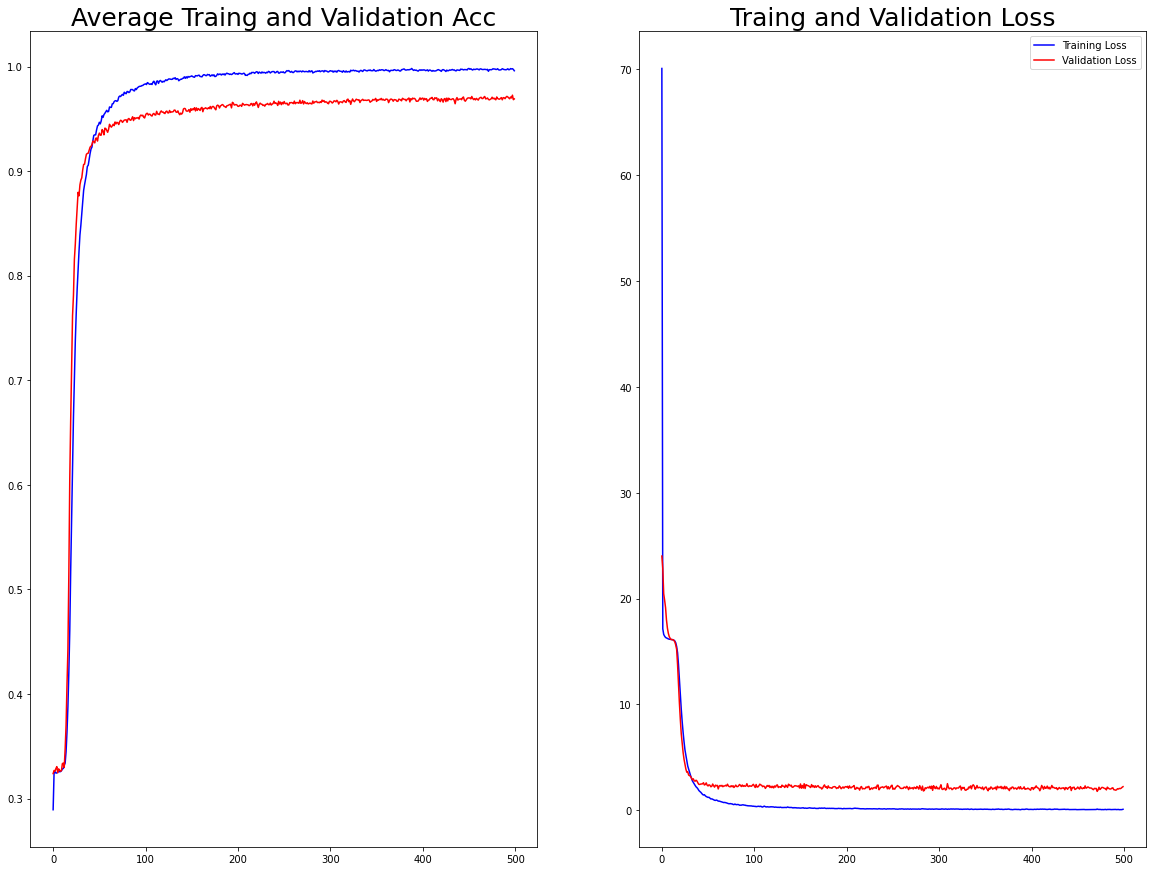

In [11]:
total_acc = np.array(history.history['c1_accuracy'])
total_val_acc = np.array(history.history['val_c1_accuracy'])
for i in range(2,8):
    total_acc = total_acc + np.array(history.history['c'+str(i)+'_accuracy'])
    total_val_acc = total_val_acc + np.array(history.history['val_c'+str(i)+'_accuracy'])

total_acc = np.array(total_acc)/7
total_val_acc = np.array(total_val_acc)/7

epochs=range(len(history.history['loss']))
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(121)
ax1.plot(epochs,total_acc,'b',label='Training Acc')
ax1.plot(epochs,total_val_acc,'r',label='Validation Acc')
ax1.set_title('Average Traing and Validation Acc',fontsize=25)

ax2 = fig.add_subplot(122)
ax2.plot(epochs,history.history['loss'],'b',label='Training Loss')
ax2.plot(epochs,history.history['val_loss'],'r',label='Validation Loss')
ax2.set_title('Traing and Validation Loss',fontsize=25)

ax2.legend()
plt.show()

In [18]:
# cnn.save('cnn.h5')
cnn.evaluate(X_test,y_test)

47/47 [==============================] - 1s 10ms/step - loss: 2.1889 - c1_loss: 0.4875 - c2_loss: 0.1463 - c3_loss: 0.2423 - c4_loss: 0.3037 - c5_loss: 0.2775 - c6_loss: 0.4191 - c7_loss: 0.3125 - c1_accuracy: 0.9784 - c2_accuracy: 0.9824 - c3_accuracy: 0.9662 - c4_accuracy: 0.9629 - c5_accuracy: 0.9656 - c6_accuracy: 0.9514 - c7_accuracy: 0.9554


[2.1889240741729736,
 0.4874822795391083,
 0.14630867540836334,
 0.24228745698928833,
 0.3037010729312897,
 0.2775065302848816,
 0.41910797357559204,
 0.31252995133399963,
 0.9783929586410522,
 0.9824442863464355,
 0.9662390351295471,
 0.9628629088401794,
 0.9655638337135315,
 0.9513841867446899,
 0.9554355144500732]

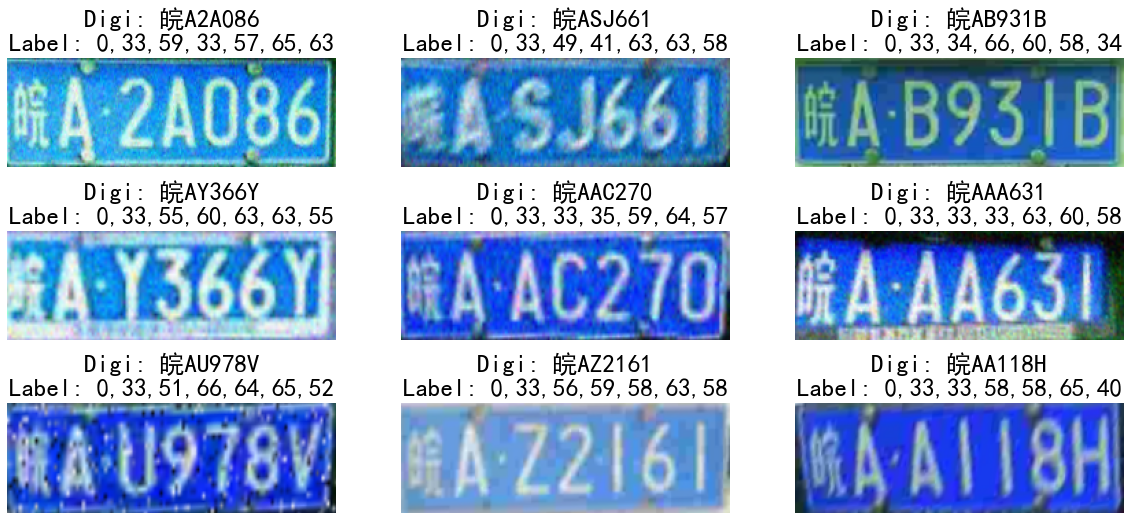

In [32]:
# import random

# num = 9
# picked = random.sample(data_list,num)

# plt.rcParams['font.sans-serif']=['SimHei']
# fig = plt.figure(figsize=(20,9))
# for i,pick in enumerate(picked):
#     cur = cv2.imdecode(np.fromfile(data_path+pick, dtype=np.uint8), cv2.IMREAD_COLOR)
#     cur = cv2.cvtColor(cur, cv2.COLOR_BGR2RGB)
#     name = pick[:7]
#     label = [digi_dict[x] for x in name]
#     label = [str(x) for x in label]
#     name = "".join(name)
#     label = ",".join(label)
#     t = "Digi: "+name+"\nLabel: "+label
    
#     ax = fig.add_subplot(3,3,i+1)
#     ax.imshow(cur)
#     ax.axis('off')
#     ax.set_title(t,fontsize=25)

# plt.show()
    